![IMAGE](https://images.medicinenet.com/images/featured/detail_heart4.jpg)

#### Import packge

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC

#### Read data

In [2]:
df=pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')
dfg=pd.read_csv('../input/heart-attack-analysis-prediction-dataset/o2Saturation.csv')

### Showing data

In [3]:
df.head().style.background_gradient(cmap = 'copper')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1


In [4]:
dfg.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [5]:
df.shape

(303, 14)

In [6]:
dfg.shape

(3585, 1)

In [7]:
df.describe().style.background_gradient(cmap = 'copper')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.isna()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.count()

age         303
sex         303
cp          303
trtbps      303
chol        303
fbs         303
restecg     303
thalachh    303
exng        303
oldpeak     303
slp         303
caa         303
thall       303
output      303
dtype: int64

In [12]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({#'column_name': train.columns,
                                 'percent_missing': percent_missing})
percent_missing

age         0.0
sex         0.0
cp          0.0
trtbps      0.0
chol        0.0
fbs         0.0
restecg     0.0
thalachh    0.0
exng        0.0
oldpeak     0.0
slp         0.0
caa         0.0
thall       0.0
output      0.0
dtype: float64

In [13]:
df.isna().mean()

age         0.0
sex         0.0
cp          0.0
trtbps      0.0
chol        0.0
fbs         0.0
restecg     0.0
thalachh    0.0
exng        0.0
oldpeak     0.0
slp         0.0
caa         0.0
thall       0.0
output      0.0
dtype: float64

In [14]:
df.describe().transpose().style.background_gradient(cmap = 'copper')

,count,mean,std,min,25%,50%,75%,max
age,303.000000,54.366337,9.082101,29.000000,47.500000,55.000000,61.000000,77.000000
sex,303.000000,0.683168,0.466011,0.000000,0.000000,1.000000,1.000000,1.000000
cp,303.000000,0.966997,1.032052,0.000000,0.000000,1.000000,2.000000,3.000000
trtbps,303.000000,131.623762,17.538143,94.000000,120.000000,130.000000,140.000000,200.000000
chol,303.000000,246.264026,51.830751,126.000000,211.000000,240.000000,274.500000,564.000000
fbs,303.000000,0.148515,0.356198,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,303.000000,0.528053,0.525860,0.000000,0.000000,1.000000,1.000000,2.000000
thalachh,303.000000,149.646865,22.905161,71.000000,133.500000,153.000000,166.000000,202.000000
exng,303.000000,0.326733,0.469794,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,303.000000,1.039604,1.161075,0.000000,0.000000,0.800000,1.600000,6.200000


##### make Boxplot

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


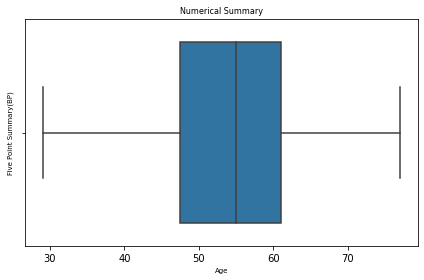

In [15]:
plot10=sns.boxplot(df['age'],orient='v')
plt.title('Numerical Summary',fontdict={'fontsize':8})
plt.xlabel('Age',fontdict={'fontsize':7})
plt.ylabel(r'Five Point Summary(BP)',fontdict={'fontsize':7})
plt.tight_layout()

In [16]:
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from scipy import stats

# using Distplot and Q-Q plot

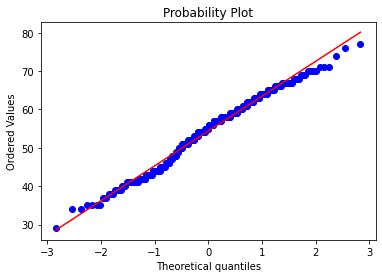

In [17]:
fig = ff.create_distplot([df.age],['age'],bin_size=5)
iplot(fig, filename='Basic Distplot')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['age'], plot=plt)
plt.show()

heatmap

Heatmap


<AxesSubplot:>

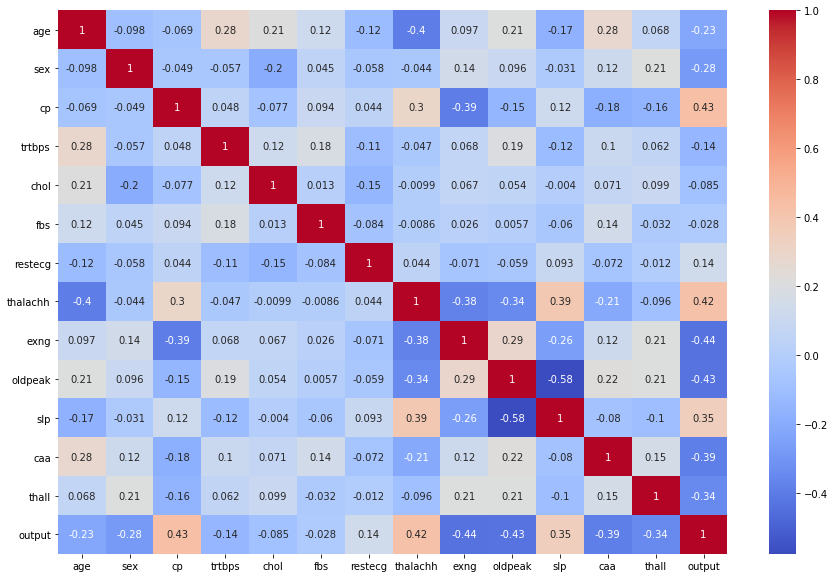

In [18]:
print('Heatmap')
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# Jointplot

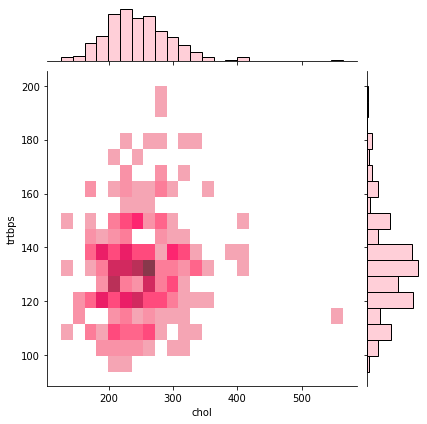

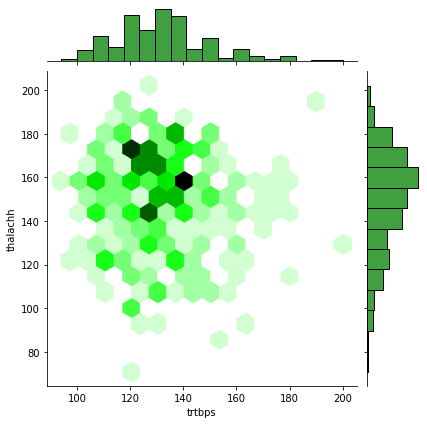

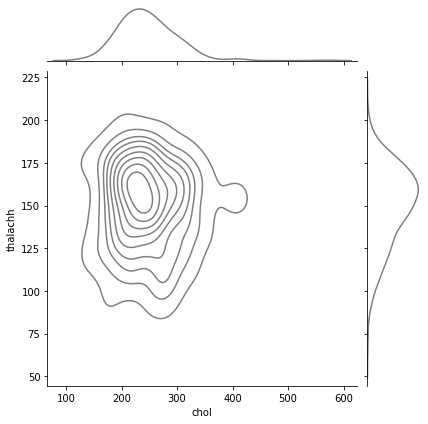

In [19]:
sns.jointplot(x = df['chol'], y = df['trtbps'], kind = 'hist',color = 'pink')
sns.jointplot(x = df['trtbps'], y = df['thalachh'], kind = 'hex', color = 'green')
sns.jointplot(x = df['chol'], y = df['thalachh'], kind = 'kde', color = 'grey')

In [20]:
fig = px.histogram(df, x="age",color="output",
                   marginal="box",
                   hover_data=df.columns,
                  color_discrete_sequence=['#f64c72','#85bfdc'])
fig.update_layout(
    title="Heart attack chance corresponding to age"
)
fig.show()

In [21]:
fig = px.scatter_3d(df, x='oldpeak', y='thalachh', z='age',
              color='output',size='trtbps',color_discrete_sequence=['#f64c72','#85bfdc'])
fig.show()

In [22]:
px.parallel_coordinates(df, color="age",) 

In [23]:
px.funnel(df, x='oldpeak', y='age')

In [24]:
df.head(1)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [25]:
px.scatter_ternary(df, a="trtbps", b="age", c="thalachh")

#### using ML algo to pred


In [26]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [27]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [28]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

#### Make Feature Scaling

In [29]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [30]:
X

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

### Make train_test split


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Using the Logistic Regresion

In [32]:
LogisticRegration= LogisticRegression()
LogisticRegration.fit(X_train,y_train)
predictions1 = LogisticRegration.predict(X_test)
print(list(predictions1))

[0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0]


In [33]:
print(classification_report(y_test,predictions1))
print('\n')
print(confusion_matrix(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75        41
           1       0.79      0.82      0.80        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



[[30 11]
 [ 9 41]]


### Fitting Logistic Regression to the Training set

In [34]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
clss = LogisticRegression(random_state = 0)
clss.fit(X_train, y_train)

LogisticRegression(random_state=0)

#### Predicting the Test set results


In [35]:
y_pred = clss.predict(X_test)
print(list(y_pred ))

[0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0]


In [36]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[30, 11],
       [ 9, 41]])

<AxesSubplot:>

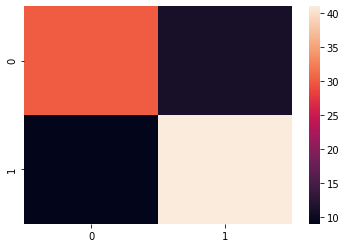

In [37]:
sns.heatmap(cm)

## Calculate Accuracy

In [38]:
from sklearn.metrics import accuracy_score
acclr = accuracy_score(y_test,predictions1)*100
acclr

78.02197802197803

### As we have seen, the result is very low. Let's improve it with another algorithm

# MLPRegressor  

In [39]:
MLPRegressorModel = MLPRegressor(activation='relu', # can be also identity , logistic , relu
                                 solver='adam',  # can be also sgd , adam
                                 learning_rate='constant', # can be also invscaling , adaptive
                                 early_stopping= False,
                                 shuffle=True,
                                 alpha=0.001 ,hidden_layer_sizes=(100, 3),random_state=33)
MLPRegressorModel.fit(X_train, y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPRegressor(alpha=0.001, hidden_layer_sizes=(100, 3), random_state=33)

In [40]:
#Calculating Details
print('MLPRegressorModel Train Score is : ' , MLPRegressorModel.score(X_train, y_train))
print('----------------------------------------------------')
print('MLPRegressorModel Test Score is : ' , MLPRegressorModel.score(X_test, y_test))
print('MLPRegressorModel loss is : ' , MLPRegressorModel.loss_)
print('----------------------------------------------------')
print('MLPRegressorModel No. of iterations is : ' , MLPRegressorModel.n_iter_)
print('----------------------------------------------------')
print('MLPRegressorModel No. of layers is : ' , MLPRegressorModel.n_layers_)
print('----------------------------------------------------')
print('MLPRegressorModel last activation is : ' , MLPRegressorModel.out_activation_)
print('----------------------------------------------------')


MLPRegressorModel Train Score is :  0.8151774649233975
----------------------------------------------------
MLPRegressorModel Test Score is :  0.1791589142533776
MLPRegressorModel loss is :  0.023151007489125932
----------------------------------------------------
MLPRegressorModel No. of iterations is :  200
----------------------------------------------------
MLPRegressorModel No. of layers is :  4
----------------------------------------------------
MLPRegressorModel last activation is :  identity
----------------------------------------------------


## MLPClassifier

In [41]:
MLPClassifierModel = MLPClassifier(activation='relu', # can be also identity , logistic , relu
                                   solver='adam',  # can be also sgd , adam
                                   learning_rate='constant', # can be also invscaling , adaptive
                                   early_stopping= False,
                                   alpha=0.0001 ,hidden_layer_sizes=(100, 3),random_state=33)
MLPClassifierModel.fit(X_train, y_train)



/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier(hidden_layer_sizes=(100, 3), random_state=33)

In [42]:
print('MLPClassifierModel Train Score is : ' , MLPClassifierModel.score(X_train, y_train))
print('************////**************')
print('MLPClassifierModel Test Score is : ' , MLPClassifierModel.score(X_test, y_test))
print('************////**************')
print('MLPClassifierModel loss is : ' , MLPClassifierModel.loss_)
print('MLPClassifierModel No. of iterations is : ' , MLPClassifierModel.n_iter_)
print('************////**************')
print('MLPClassifierModel No. of layers is : ' , MLPClassifierModel.n_layers_)
print('************////**************')
print('MLPClassifierModel last activation is : ' , MLPClassifierModel.out_activation_)
print('************////**************')

MLPClassifierModel Train Score is :  0.9481132075471698
************////**************
MLPClassifierModel Test Score is :  0.8021978021978022
************////**************
MLPClassifierModel loss is :  0.14576506657875798
MLPClassifierModel No. of iterations is :  200
************////**************
MLPClassifierModel No. of layers is :  4
************////**************
MLPClassifierModel last activation is :  logistic
************////**************


#### Calculating Prediction

In [43]:
#Calculating Prediction
y_pred = MLPClassifierModel.predict(X_test)
y_pred_prob = MLPClassifierModel.predict_proba(X_test)
print('Predicted Value for MLPClassifierModel is : ' , y_pred[:10])
print('*******************************')
print('Prediction Probabilities Value for MLPClassifierModel is : ' , y_pred_prob[:10])



Predicted Value for MLPClassifierModel is :  [0 1 0 0 0 0 0 1 0 1]
*******************************
Prediction Probabilities Value for MLPClassifierModel is :  [[9.99954579e-01 4.54207824e-05]
 [2.79750044e-01 7.20249956e-01]
 [9.81130611e-01 1.88693890e-02]
 [9.98732633e-01 1.26736711e-03]
 [9.93645951e-01 6.35404881e-03]
 [9.99636482e-01 3.63517608e-04]
 [9.84209632e-01 1.57903682e-02]
 [4.37019011e-01 5.62980989e-01]
 [9.99369972e-01 6.30028009e-04]
 [1.47588631e-03 9.98524114e-01]]


Confusion Matrix is : 
 [[31 10]
 [ 8 42]]


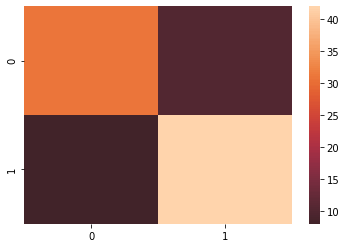

In [44]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()
 


In [45]:
SVRModel = SVR(C = 1.0 ,epsilon=0.1,kernel = 'rbf') # it also can be : linear, poly, rbf, sigmoid, precomputed
SVRModel.fit(X_train, y_train)

#Calculating Details
print('SVRModel Train Score is : ' , SVRModel.score(X_train, y_train))
print('----------------------------------------------------')
print('SVRModel Test Score is : ' , SVRModel.score(X_test, y_test))



SVRModel Train Score is :  0.8696185004672785
----------------------------------------------------
SVRModel Test Score is :  0.33533352288680296


### Calculating Prediction

In [46]:
#Calculating Prediction
y_pred = SVRModel.predict(X_test)
print('Predicted Value for SVRModel is : ' , y_pred[:10])


Predicted Value for SVRModel is :  [ 0.39306406  0.5773403   0.06322727 -0.14240049 -0.10170659  0.00333236
  0.1870854   0.52984497 -0.11244944  1.01488286]


In [47]:
SVCModel = SVC(kernel= 'rbf',# it can be also linear,poly,sigmoid,precomputed
               max_iter=100000,C=1,gamma='auto')
SVCModel.fit(X_train, y_train)

#Calculating Details
print('SVCModel Train Score is : ' , SVCModel.score(X_train, y_train))
print('******************************************')
print('SVCModel Test Score is : ' , SVCModel.score(X_test, y_test))


SVCModel Train Score is :  0.9292452830188679
******************************************
SVCModel Test Score is :  0.7912087912087912


#### Calculating Prediction

In [48]:
#Calculating Prediction
y_pred = SVCModel.predict(X_test)
print('Predicted Value for SVCModel is : ' , y_pred[:10])


Predicted Value for SVCModel is :  [0 1 0 0 0 0 0 0 0 1]


Confusion Matrix is : 
 [[31 10]
 [ 9 41]]


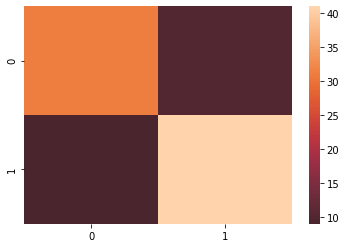

In [49]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

<h1><center>If you enjoy this notebook, don't forget to vote🙌😄☀️</center></h1>